# Linear Regression Analysis
## Regrssion analysis
Let's now perform regression analysis on the numerical variables that we have, and then we can see if it's enough

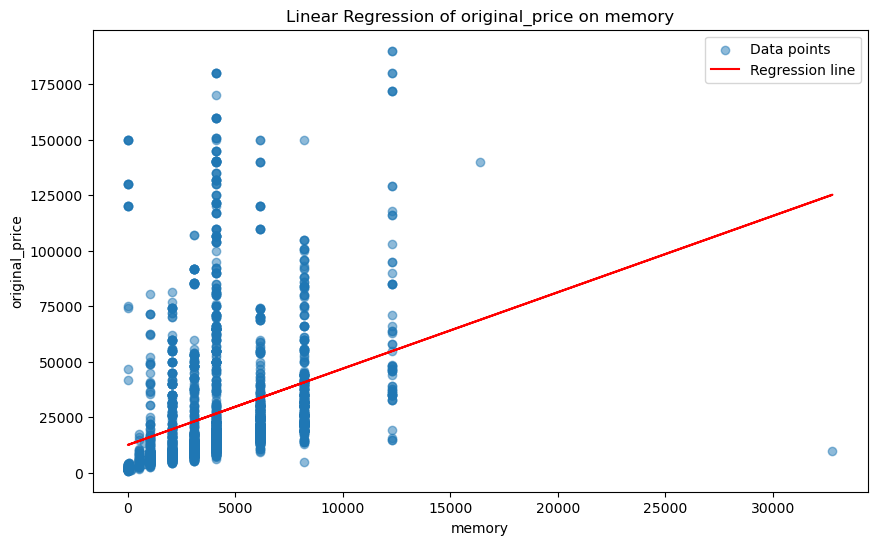

Regression results for original_price on memory:
                            OLS Regression Results                            
Dep. Variable:         original_price   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     303.6
Date:                Thu, 07 Mar 2024   Prob (F-statistic):           8.20e-65
Time:                        23:51:34   Log-Likelihood:                -34573.
No. Observations:                2970   AIC:                         6.915e+04
Df Residuals:                    2968   BIC:                         6.916e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

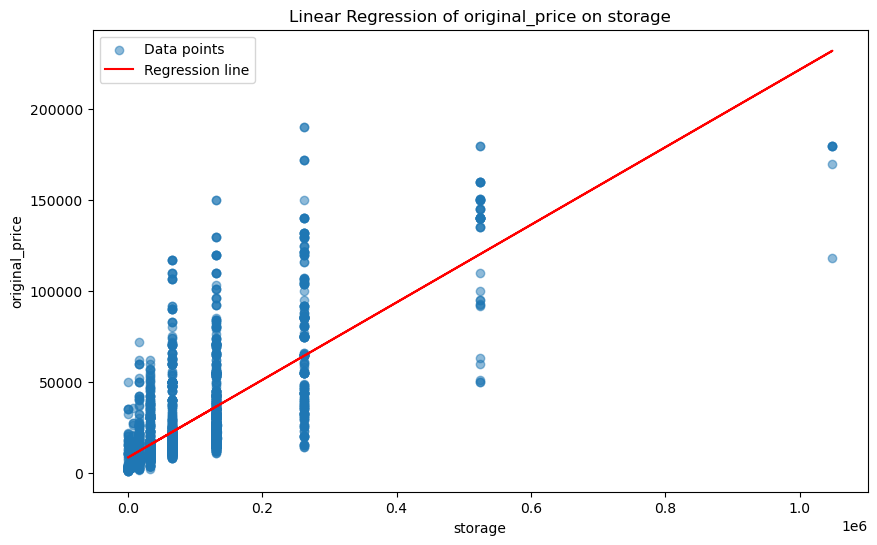

Regression results for original_price on storage:
                            OLS Regression Results                            
Dep. Variable:         original_price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     3220.
Date:                Thu, 07 Mar 2024   Prob (F-statistic):               0.00
Time:                        23:51:34   Log-Likelihood:                -33627.
No. Observations:                2970   AIC:                         6.726e+04
Df Residuals:                    2968   BIC:                         6.727e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
co

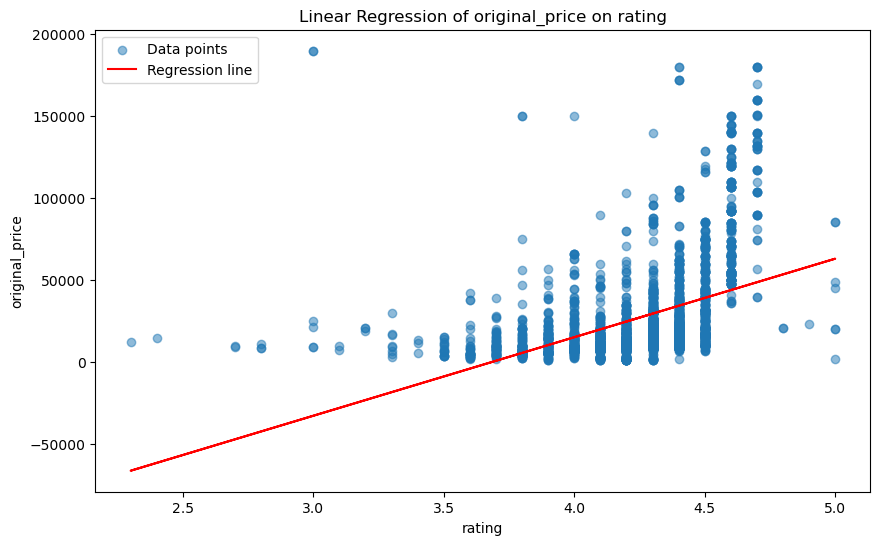

Regression results for original_price on rating:
                            OLS Regression Results                            
Dep. Variable:         original_price   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     759.3
Date:                Thu, 07 Mar 2024   Prob (F-statistic):          4.92e-149
Time:                        23:51:34   Log-Likelihood:                -34380.
No. Observations:                2970   AIC:                         6.876e+04
Df Residuals:                    2968   BIC:                         6.878e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df=pd.read_csv('Clean_sales.csv')
df=df.dropna()

def linear_regression_per_column(df, Y, X_list):

    for X in X_list:
        X_data = sm.add_constant(df[X]) 
        Y_data = df[Y]

        # Perform linear regression
        model = sm.OLS(Y_data, X_data).fit()

        # Plotting
        plt.figure(figsize=(10, 6))
        plt.scatter(df[X], Y_data, alpha=0.5, label='Data points')
        plt.plot(df[X], model.predict(X_data), 'r', label='Regression line')
        plt.title(f'Linear Regression of {Y} on {X}')
        plt.xlabel(X)
        plt.ylabel(Y)
        plt.legend()
        plt.show()

        # Print the regression results
        print(f"Regression results for {Y} on {X}:")
        print(model.summary())
        print("\n" + "="*50 + "\n")

linear_regression_per_column(df, 'original_price',['memory','storage','rating'])

# Multiple Regression

In [2]:
df.drop(['model','selling_price','discount','disc_perc','color'], axis=1 ,inplace=True)

final_df=pd.DataFrame(columns=df.columns)
for v in df.columns:
    if v in ['memory','storage','rating']:
        maximum=df[v].max()
        minimum=df[v].min()
        final_df[v]=df[v].apply(lambda x: ((x-minimum)/(maximum-minimum)))
    else:
        final_df[v]=df[v]

final_df['brand']=final_df['brand'].astype('category')
final_df=pd.get_dummies(final_df)

In [3]:
X = final_df.drop('original_price', axis=1)
y = final_df['original_price']
X['pro'] = X['pro'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f'The standard deviation of the error is {round(rmse,2)},so around 166,99 €')
print(f'The R^2 value is {r2}, so {round(r2*100,2)}% of the variance is explained')

The standard deviation of the error is 15132.81,so around 166,99 €
The R^2 value is 0.7676624329906231, so 76.77% of the variance is explained


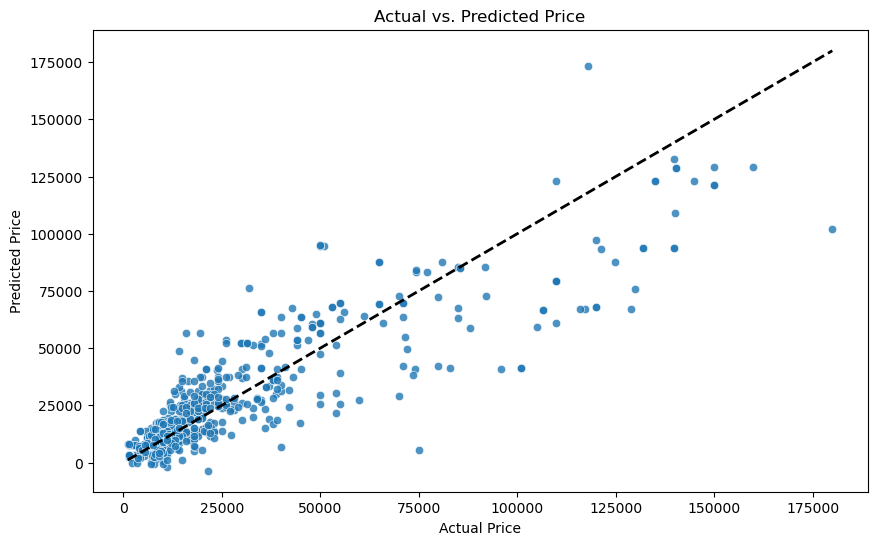

In [4]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.8)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()

## Try 2 - Only Brands

In [5]:
final_df.head()

,pro,memory,storage,rating,original_price,brand_ASUS,brand_Apple,brand_GIONEE,brand_Google Pixel,brand_HTC,...,brand_LG,brand_Lenovo,brand_Motorola,brand_Nokia,brand_OPPO,brand_POCO,brand_SAMSUNG,brand_Xiaomi,brand_realme,brand_vivo
0,False,0.2500,0.125000,0.740741,20999,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,False,0.0625,0.015625,0.555556,10199,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,False,0.0625,0.000000,0.777778,7999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,False,0.1250,0.062500,0.703704,12999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,0.1250,0.062500,0.851852,49900,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
final_df.drop(['memory','storage','rating'],axis=1 ,inplace=True)

X = final_df.drop('original_price', axis=1)
y = final_df['original_price']
X['pro'] = X['pro'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse2 = np.sqrt(mean_squared_error(y_test, y_pred))
r22 = r2_score(y_test, y_pred)


print(f'The standard deviation of the error is {round(rmse2,2)},so around 166,99 €')
print(f'The R^2 value is {r22}, so {round(r22*100,2)}% of the variance is explained')

The standard deviation of the error is (21054, 2),so around 166,99 €
The R^2 value is 0.5502712430224409, so 55.03% of the variance is explained


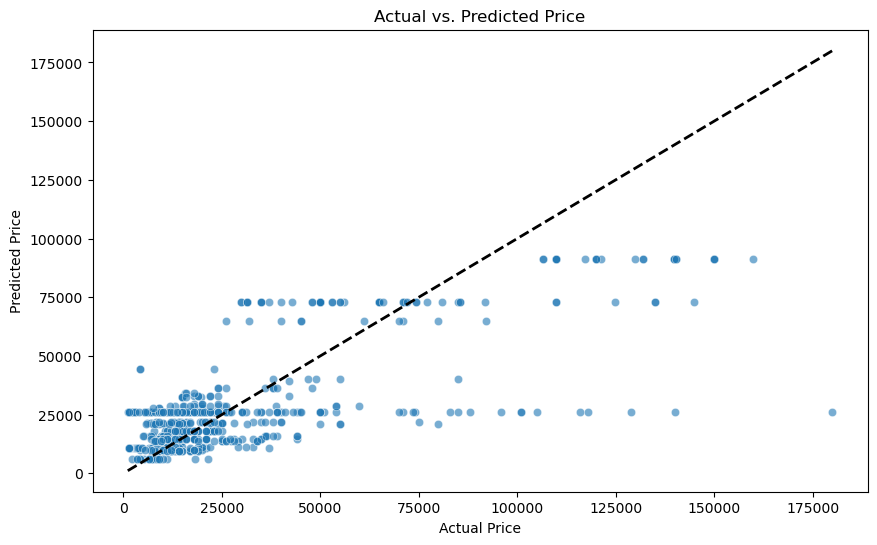

In [7]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()